### Importación de datos



In [17]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [4]:
#Ingreso total por cada tienda
ingreso_total = tienda['Precio'].sum()
ingreso_total2 = tienda2['Precio'].sum()
ingreso_total3 = tienda3['Precio'].sum()
ingreso_total4 = tienda4['Precio'].sum()

print("Ingreso total de Tienda 1:",ingreso_total)
print("Ingreso total de Tienda 2:",ingreso_total2)
print("Ingreso total de Tienda 3:",ingreso_total3)
print("Ingreso total de Tienda 4:",ingreso_total4)

Ingreso total de Tienda 1: 1150880400.0
Ingreso total de Tienda 2: 1116343500.0
Ingreso total de Tienda 3: 1098019600.0
Ingreso total de Tienda 4: 1038375700.0


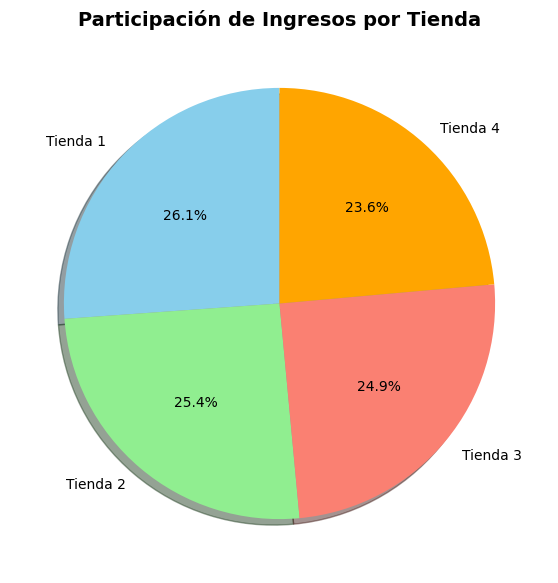

In [12]:
import matplotlib.pyplot as plt

# Datos de facturación
ingresos = [ingreso_total, ingreso_total2, ingreso_total3, ingreso_total4]
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Gráfico circular
plt.figure(figsize=(7,7))
plt.pie(
    ingresos,
    labels=tiendas,
    autopct='%1.1f%%',   # Porcentaje con 1 decimal
    startangle=90,       # Empieza desde arriba
    colors=["skyblue","lightgreen","salmon","orange"],
    shadow=True
)

plt.title("Participación de Ingresos por Tienda", fontsize=14, fontweight="bold")
plt.show()

# 2. Ventas por categoría

In [6]:
ventas_cat_tienda1 = tienda.groupby("Categoría del Producto")["Producto"].count()
ventas_cat_tienda2 = tienda2.groupby("Categoría del Producto")["Producto"].count()
ventas_cat_tienda3 = tienda3.groupby("Categoría del Producto")["Producto"].count()
ventas_cat_tienda4 = tienda4.groupby("Categoría del Producto")["Producto"].count()

comparacion_categorias = pd.DataFrame({
         "Tienda 1": ventas_cat_tienda1,
         "Tienda 2": ventas_cat_tienda2,
         "Tienda 3": ventas_cat_tienda3,
         "Tienda 4": ventas_cat_tienda4
          }).fillna(0)

comparacion_categorias["Total"] = comparacion_categorias.sum(axis=1)
comparacion_categorias = comparacion_categorias.sort_values(by="Total", ascending=False)

print(comparacion_categorias)

                         Tienda 1  Tienda 2  Tienda 3  Tienda 4  Total
Categoría del Producto                                                
Muebles                       465       442       499       480   1886
Electrónicos                  448       422       451       451   1772
Juguetes                      324       313       315       338   1290
Electrodomésticos             312       305       278       254   1149
Deportes y diversión          284       275       277       277   1113
Instrumentos musicales        182       224       177       170    753
Libros                        173       197       185       187    742
Artículos para el hogar       171       181       177       201    730


<Figure size 1200x600 with 0 Axes>

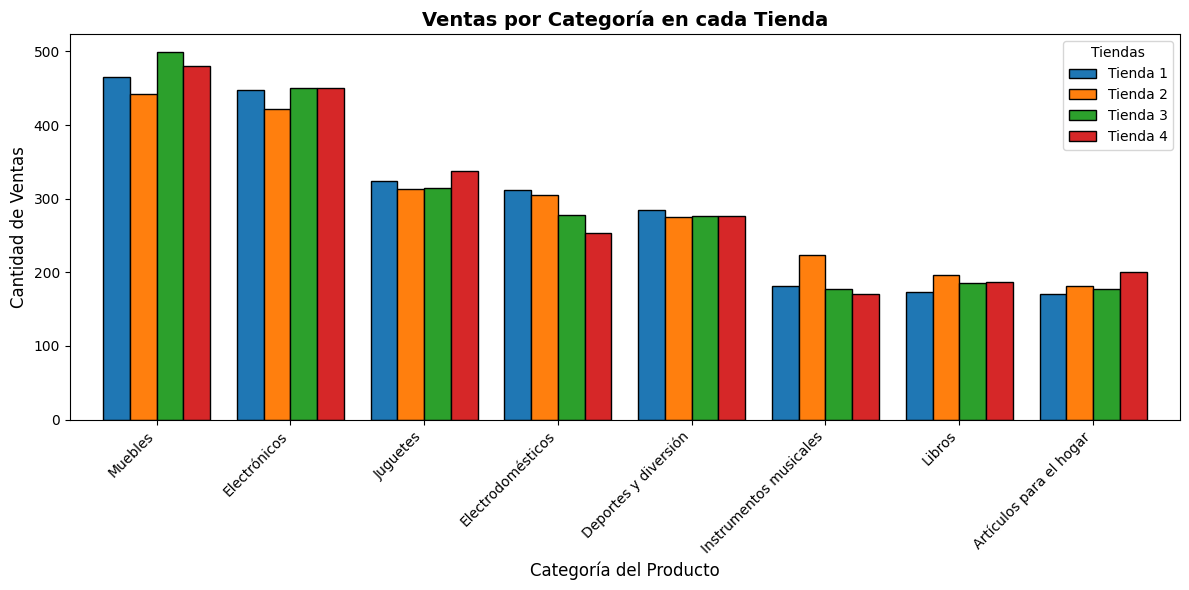

In [10]:
import matplotlib.pyplot as plt

categorias = comparacion_categorias.index
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure(figsize=(12,6))

# Gráfico de barras agrupadas
comparacion_categorias[tiendas].plot(
    kind="bar",
    figsize=(12,6),
    width=0.8,
    edgecolor="black"
)

plt.title("Ventas por Categoría en cada Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Categoría del Producto", fontsize=12)
plt.ylabel("Cantidad de Ventas", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tiendas")

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [8]:
calificacion_promedio_tienda1 = tienda["Calificación"].mean()
calificacion_promedio_tienda2 = tienda2["Calificación"].mean()
calificacion_promedio_tienda3 = tienda3["Calificación"].mean()
calificacion_promedio_tienda4 = tienda4["Calificación"].mean()

calificacion_promedio = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación Promedio": [calificacion_promedio_tienda1, calificacion_promedio_tienda2, calificacion_promedio_tienda3, calificacion_promedio_tienda4]
})

print(calificacion_promedio)

     Tienda  Calificación Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


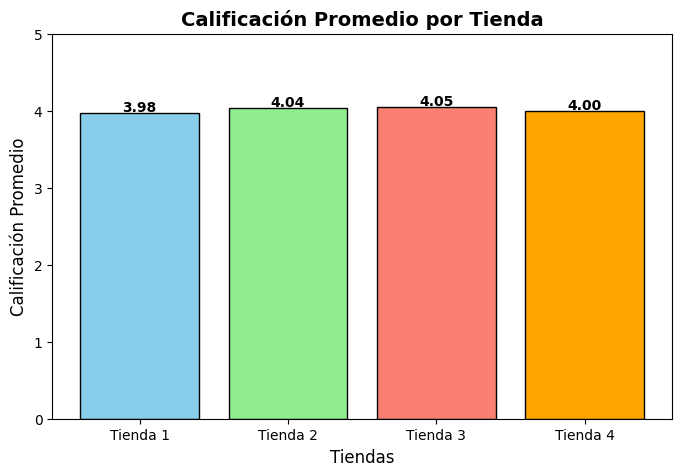

In [9]:
import matplotlib.pyplot as plt

tiendas = calificacion_promedio["Tienda"]
promedios = calificacion_promedio["Calificación Promedio"]

# Gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(tiendas, promedios, color=["skyblue", "lightgreen", "salmon", "orange"], edgecolor="black")

plt.title("Calificación Promedio por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Calificación Promedio", fontsize=12)

for i, v in enumerate(promedios):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=10, fontweight="bold")

plt.ylim(0, 5)  # Escala de calificación de 0 a 5
plt.show()

# 4. Productos más y menos vendidos

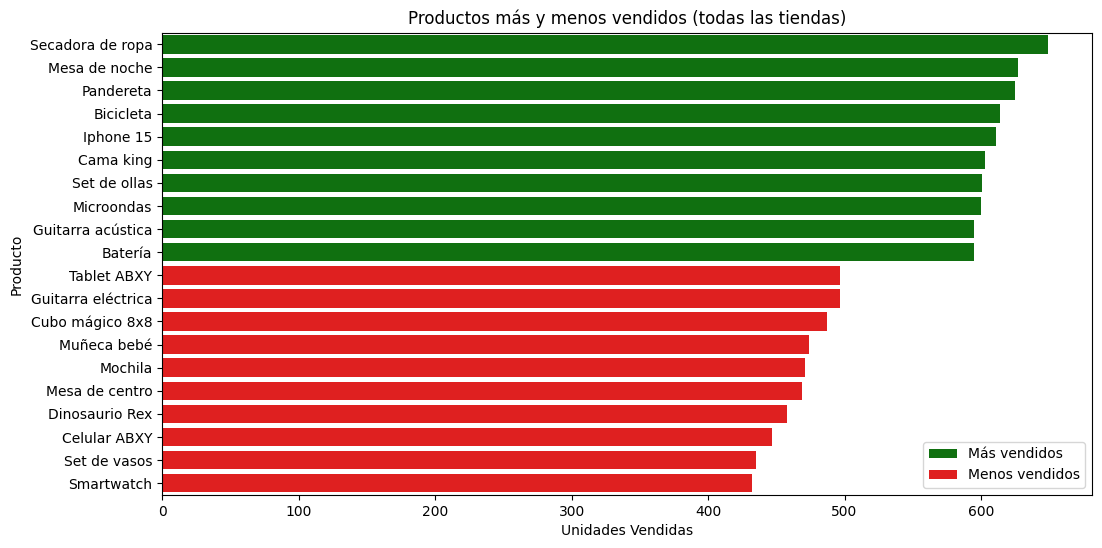

interactive(children=(Dropdown(description='t', options=('Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'), valu…

<function __main__.<lambda>(t)>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display


# Unir todos los datasets (sin agregar columna tienda)
df_total = pd.concat([tienda, tienda2, tienda3, tienda4])

# --- 1. Gráfico general (más vendidos y menos vendidos en todas las tiendas) ---
ventas_por_producto = df_total.groupby("Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=ventas_por_producto.head(10).values, y=ventas_por_producto.head(10).index, color="green", label="Más vendidos")
sns.barplot(x=ventas_por_producto.tail(10).values, y=ventas_por_producto.tail(10).index, color="red", label="Menos vendidos")

plt.xlabel("Unidades Vendidas")
plt.ylabel("Producto")
plt.title("Productos más y menos vendidos (todas las tiendas)")
plt.legend()
plt.show()


# --- 2. Gráfico por tienda con selector ---
def graficar_por_tienda(nombre_tienda, df):
    ventas = df.groupby("Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(16,6))

    # Más vendidos
    sns.barplot(x=ventas.head(5).values, y=ventas.head(5).index, ax=axes[0], palette="Greens_r")
    axes[0].set_title(f"Top 5 productos más vendidos - {nombre_tienda}")
    axes[0].set_xlabel("Unidades Vendidas")
    axes[0].set_ylabel("Producto")

    # Menos vendidos
    sns.barplot(x=ventas.tail(5).values, y=ventas.tail(5).index, ax=axes[1], palette="Reds_r")
    axes[1].set_title(f"Top 5 productos menos vendidos - {nombre_tienda}")
    axes[1].set_xlabel("Unidades Vendidas")
    axes[1].set_ylabel("Producto")

    plt.tight_layout()
    plt.show()


# Selector interactivo
tiendas_dict = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

widgets.interact(lambda t: graficar_por_tienda(t, tiendas_dict[t]),
                 t=list(tiendas_dict.keys()))


# 5. Envío promedio por tienda

In [23]:
promedios_envio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean(),
}
df_promedios = pd.DataFrame(list(promedios_envio.items()), columns=["Tienda", "Costo de envío Promedio"])


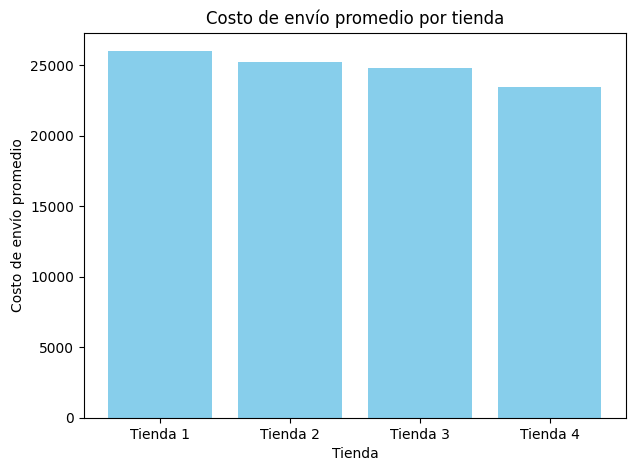

In [24]:
# Gráfico de barras
plt.figure(figsize=(7,5))
plt.bar(df_promedios["Tienda"], df_promedios["Costo de envío Promedio"], color="skyblue")
plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio")
plt.show()

# Informe de Análisis de Tiendas para el Sr. Juan
## Introducción

El presente informe tiene como objetivo analizar el desempeño de cuatro tiendas con el fin de recomendar a cuál de ellas debería vender el Sr. Juan. Para ello, se consideraron factores clave como ingresos totales, categorías de productos más y menos vendidas, calificaciones promedio de los clientes, productos más y menos vendidos, y coste de envío promedio.

## Desarrollo

### 1. Ingresos totales

Se observó que la Tienda 4 presenta menores ingresos en comparación con las demás.

### 2. Categorías de productos

Las categorías con mayor rotación de ventas se concentran en productos de alta demanda, mientras que otras muestran menor salida.

La Tienda 4 maneja un nivel estable de ventas en categorías específicas, aunque no lidera el mercado.

### 3. Calificaciones de clientes

La Tienda 4 se posiciona en el penúltimo lugar en calificaciones, lo que refleja oportunidades de mejora en satisfacción del cliente.

### 4. Productos más y menos vendidos

En todas las tiendas existen productos con alta rotación y otros con ventas bajas. La Tienda 4, aunque no lidera, mantiene consistencia en algunos artículos clave.

### 5. Costo de envío

La Tienda 4 destaca positivamente al tener un costo de envío menor en comparación con las otras tiendas, lo que representa una ventaja competitiva para atraer clientes sensibles al precio.

## Conclusión

Tras analizar todos los factores, se recomienda que el Sr. Juan venda en la Tienda 4.
Si bien sus ingresos y calificaciones no son los más altos, esta tienda ofrece un costo de envío más bajo, lo cual puede incentivar la compra y atraer mayor volumen de clientes. Además, su posición intermedia en otros indicadores la convierte en una opción más equilibrada frente a sus competidores.
En conclusión, la ventaja en costos logísticos puede compensar las debilidades en ingresos y calificación, haciendo de la Tienda 4 la opción más adecuada para iniciar ventas.